In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv('C:\\Users\\arsam\\Desktop\\Dataset 2.csv')
print(df1.shape)
print(df1.head())
print(df1.info())

(5050, 23)
   Customer_id checking_status  duration                  credit_history  \
0            1              <0      19.0  critical/other existing credit   
1            2              <0      60.0                   existing paid   
2            3              <0      72.0  critical/other existing credit   
3            4              <0       NaN                   existing paid   
4            5              <0      67.0              delayed previously   

    purpose  credit_amount savings_status  employment  installment_commitment  \
0  business          640.0           <100  unemployed                       1   
1  business          903.0           <100      1<=X<4                       2   
2  business          523.0           <100      1<=X<4                       2   
3  business          605.0           <100      4<=X<7                       2   
4  business          709.0           <100      1<=X<4                       2   

  personal_status  ... age  other_payment_pla

In [2]:
df1['checking_status'].unique()

array(['<0', '>=200', '0<=X<200', 'no checking'], dtype=object)

In [3]:
df1['employment'].unique()

array(['unemployed', '1<=X<4', '4<=X<7', '<1', '>=7', nan], dtype=object)

In [4]:
df1.columns

Index(['Customer_id', 'checking_status', 'duration', 'credit_history',
       'purpose', 'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'bureau_score', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'Spend_debit_card', 'class'],
      dtype='object')

In [5]:
df1.describe()

,Customer_id,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
count,5050.00000,5048.000000,5.048000e+03,5050.000000,5050.000000,5050.000000,5050.000000,5043.000000,5050.000000
mean,2525.50000,35.365095,7.294560e+04,3.026139,2.549505,44.893267,200.471287,6.244101,2507.577624
std,1457.95376,30.754801,3.943092e+06,18.024623,1.119351,16.725905,155.330759,4.427129,1462.481192
min,1.00000,4.000000,2.500000e+02,1.000000,1.000000,19.000000,10.000000,1.000000,-50.000000
25%,1263.25000,18.000000,9.580000e+02,2.000000,2.000000,30.000000,40.000000,2.000000,1225.000000
50%,2525.50000,33.000000,4.297000e+03,3.000000,3.000000,43.000000,190.000000,6.000000,2532.500000
75%,3787.75000,51.000000,1.087525e+04,4.000000,4.000000,59.000000,340.000000,10.000000,3762.750000
max,5050.00000,999.000000,2.728040e+08,772.000000,4.000000,200.000000,480.000000,14.000000,5000.000000


> it is clear from above describtions that column duration,credit_amount, install_commitment, age has outliers.

In [6]:
df1['age'].unique()

array([ 22,  25,  24,  30,  62,  41,  46,  53,  36,  35,  70,  55,  67,
        33,  58,  34,  20,  37,  32,  71,  60,  73,  52,  19,  63,  21,
        50,  31,  28,  26,  43,  66,  29,  56,  42,  49,  44,  23,  54,
        68,  27,  47,  51,  74,  72,  75,  57,  38,  45,  40,  65,  61,
        59,  69,  39,  48,  64, 200, 131, 130, 150, 102], dtype=int64)

In [7]:
df1['age'].value_counts()

26     129
25     125
23     125
27     125
31     123
      ... 
200      1
131      1
130      1
150      1
102      1
Name: age, Length: 62, dtype: int64

In [8]:
(df1['credit_amount'].isnull().sum()/len(df1['credit_amount']))*100

0.039603960396039604

In [9]:
#column info
for x in df1.columns.values:
        print(x,"column unique values:",df1[x].unique())
        print("null values:", df1[x].isnull().sum())
        print('null percentage:', (df1[x].isnull().sum()/len(df1[x])*100))
        print("--------------------------")

Customer_id column unique values: [   1    2    3 ... 5048 5049 5050]
null values: 0
null percentage: 0.0
--------------------------
checking_status column unique values: ['<0' '>=200' '0<=X<200' 'no checking']
null values: 0
null percentage: 0.0
--------------------------
duration column unique values: [ 19.  60.  72.  nan  67.  50.  54.  33.  48.  66.  46.  61.  31.  35.
  11.  64.  32.  65.  23.  70.  30.  69.  29.  36.  24.  27.  18.  15.
  13.  21.  14.  45.  71.  38.  17.  59.  25.   8.  47.  62.  53.  26.
  51. 999.  12.   6.  34.  16.  20.  44.  41.  43.  37.   4.  40.  56.
  39.  10.   7.  42.   5.  55.   9.  68.  22.  57.  28.  58.  49.  52.
  63.]
null values: 2
null percentage: 0.039603960396039604
--------------------------
credit_history column unique values: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
null values: 0
null percentage: 0.0
--------------------------
purpose column unique values: ['business' 'dome

In [10]:
# finding duplicates in dataset based on customer_id column.
duplicates = df1[df1.duplicated('Customer_id')]
duplicates
# It is clear that there is no duplicates in this dataset.

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class


 # treating the missing values by using dropna and fillna:

 > it is very clear that columns[duration,'credit_amount', 'savings_status', 'employment',
   'property_magnitude','housing', 'no_dependaents'] has null values.

In [11]:
df1.dropna(subset=['duration','credit_amount', 'savings_status', 'employment','property_magnitude'],inplace=True)
df1.isnull().sum()


Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   8
bureau_score              0
job                       0
num_dependents            7
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

In [12]:
#replacing NaN in 'num_of depedents' column by mean(average) value.
df1['num_dependents'].value_counts()
df1['num_dependents'].describe()
df1["num_dependents"] = df1['num_dependents'].fillna(df1.num_dependents.mean())
df1.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   8
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

In [13]:
#replacing NaN in housing column by most frequent value: own
df1['housing'].value_counts()
df1["housing"] = df1['housing'].fillna(df1.housing.value_counts().index[0])
df1['housing'].value_counts()


own         2029
rent        1571
for free    1440
Name: housing, dtype: int64

In [14]:
df1.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

> now there is no missing values in the dataset.
all the missing values were treated.

# distribution and grapical plots

<Axes: >

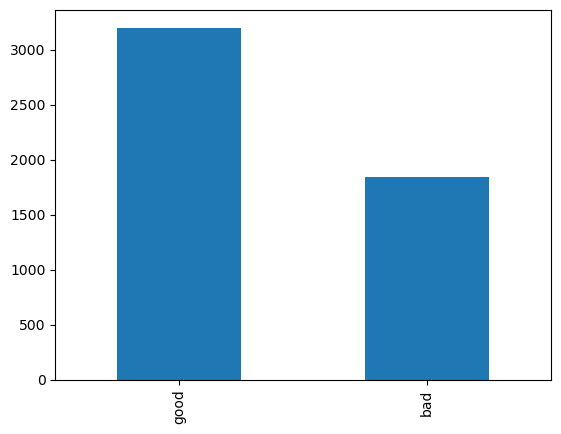

In [15]:
#target column class - statisitics
df1["class"].value_counts().plot(kind="bar")

> from the grapgh it is clear that good customer is more than bad customer.

In [16]:
df2 = df1.select_dtypes(include='number')
df2.columns

Index(['Customer_id', 'duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'bureau_score', 'num_dependents',
       'Spend_debit_card'],
      dtype='object')

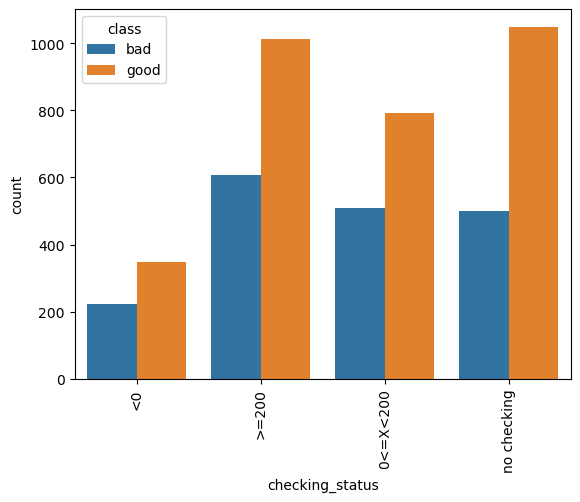

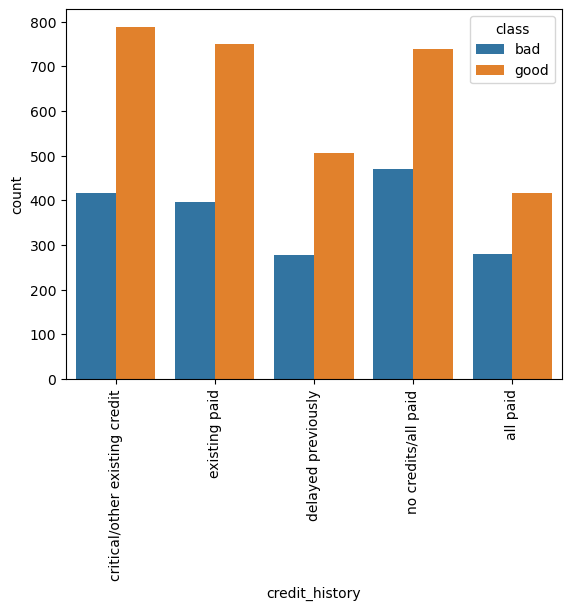

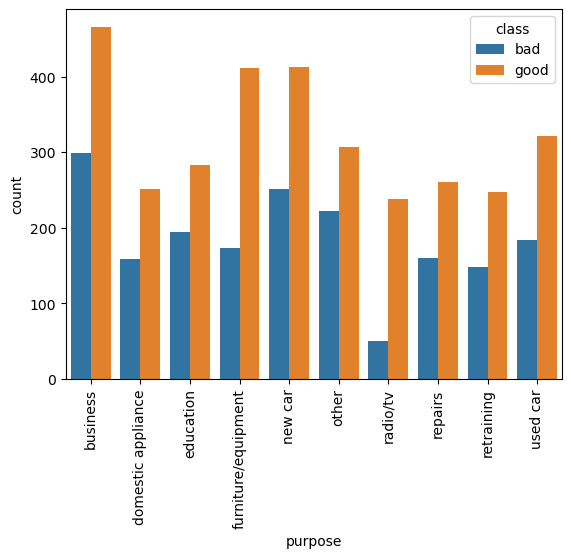

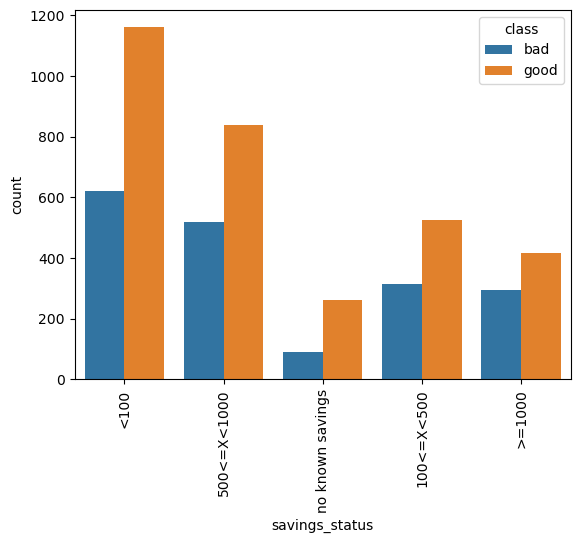

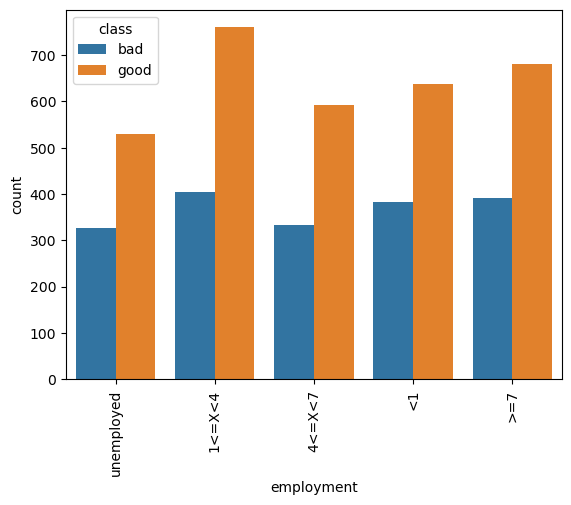

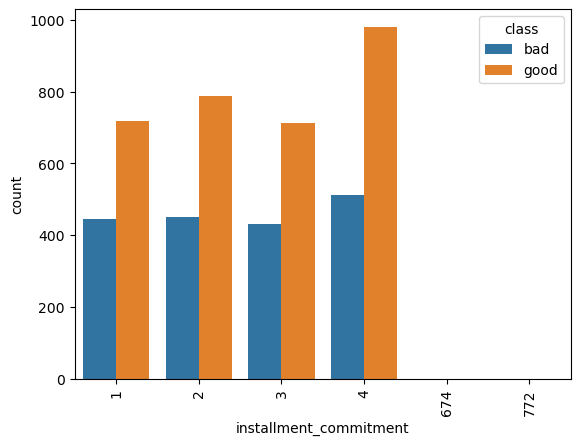

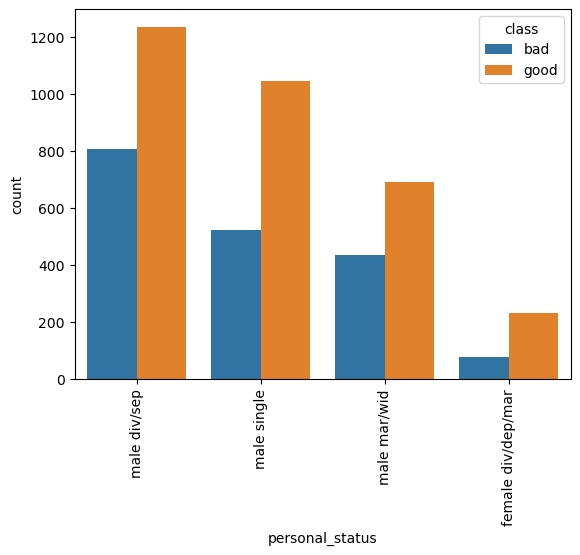

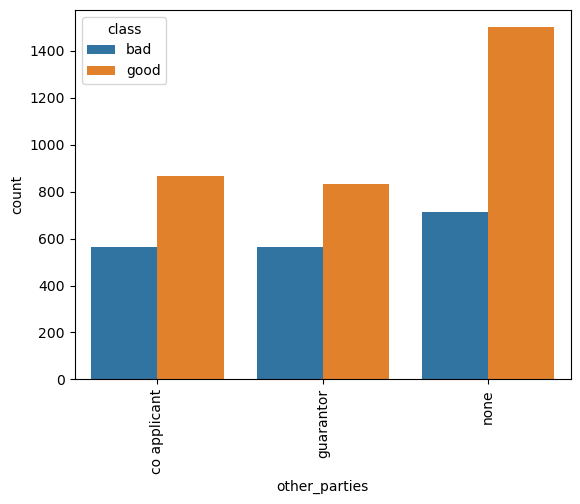

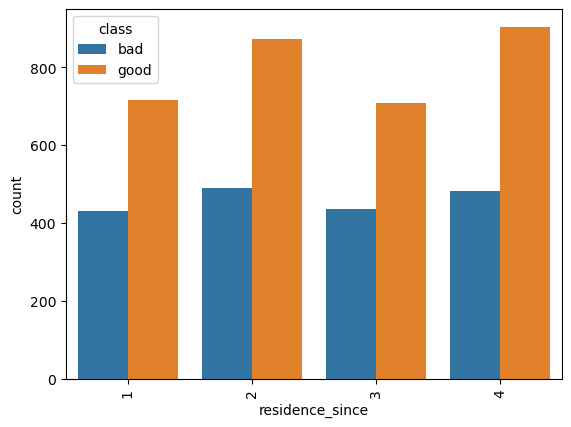

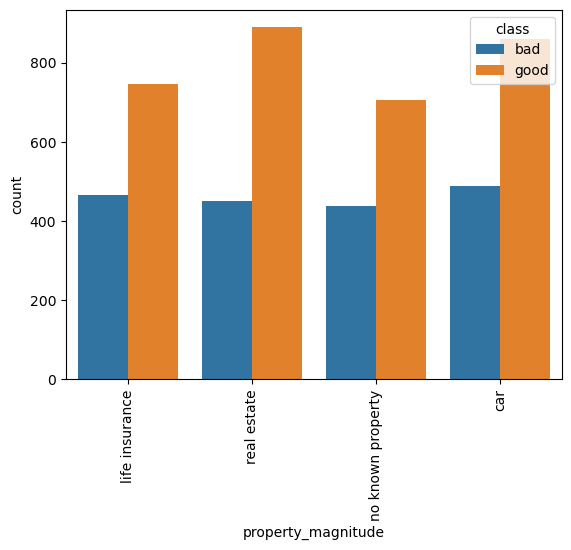

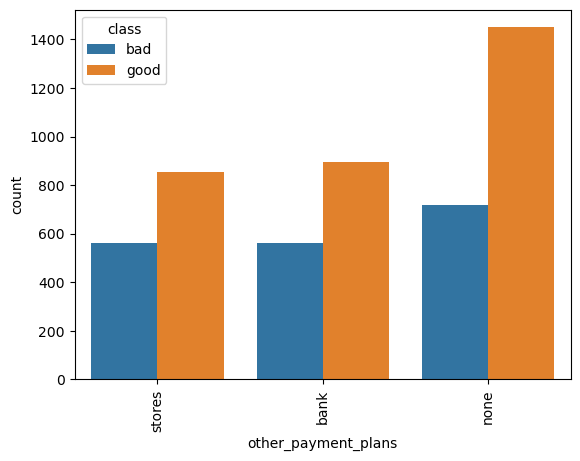

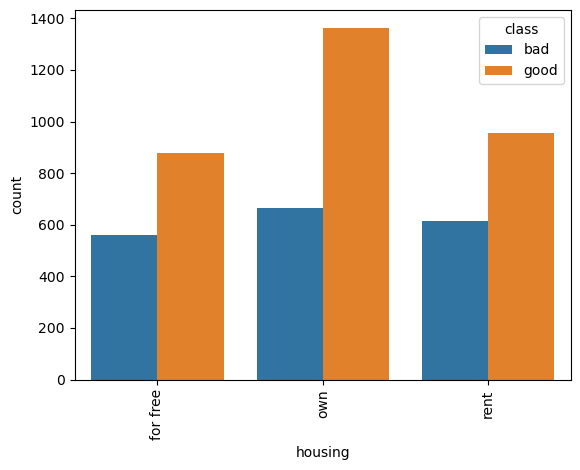

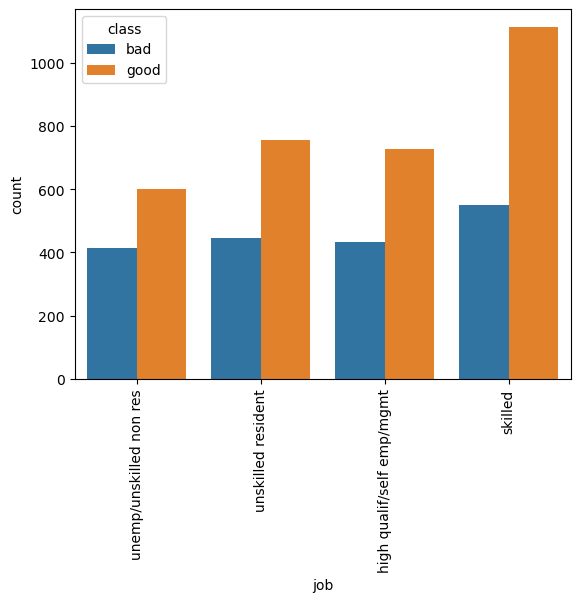

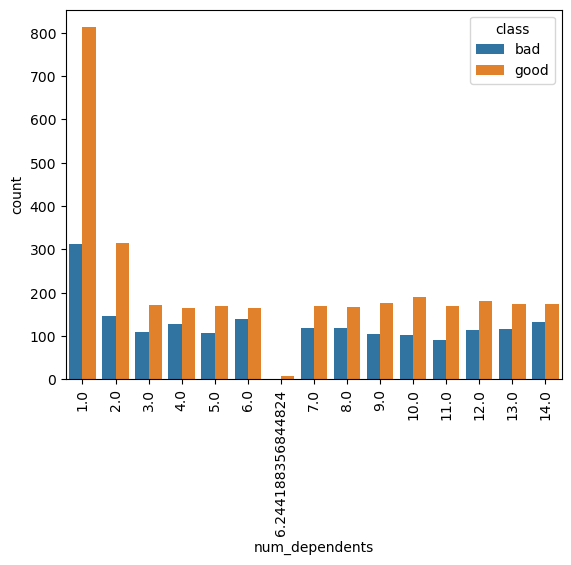

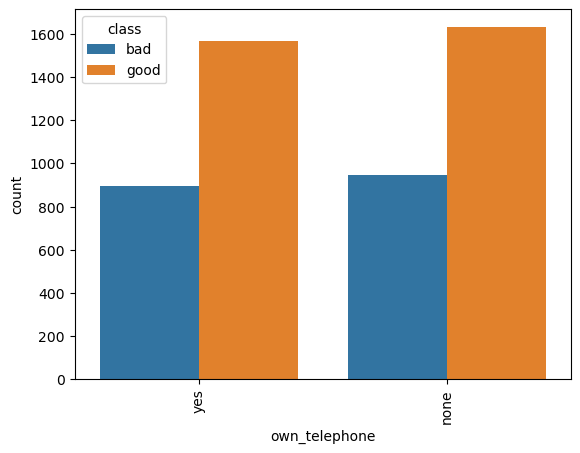

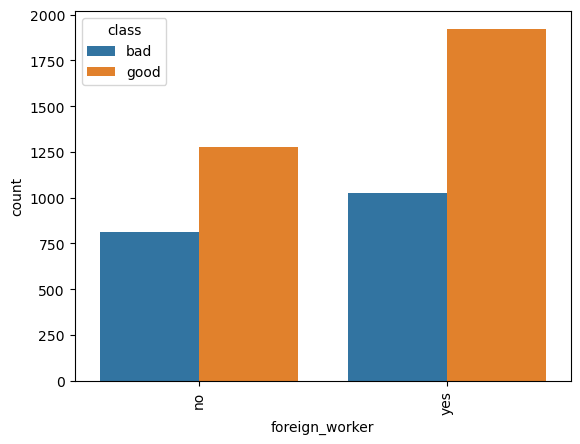

In [17]:

#column info
for col in (df1.columns.values):
    if (col not in ['Customer_id','duration','age','credit_amount','Spend_debit_card','class','bureau_score']):
        g=sns.countplot(x=col,hue="class",data=df1)
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()
    

In [18]:
df1.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

In [19]:
df1_cat = df1.select_dtypes(exclude=["int64","float64"]).copy()
df1_num = df1.select_dtypes(exclude=["object","category"]).copy()

<Axes: >

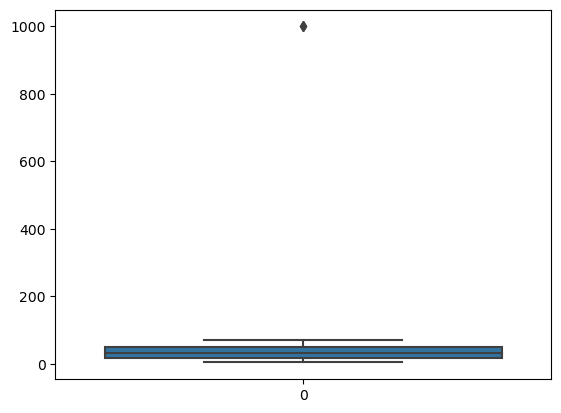

In [20]:
sns.boxplot(df1['duration'])

In [21]:
df2 = df1.drop(['Customer_id'],axis=1)

C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


IndexError: index 8 is out of bounds for axis 0 with size 8

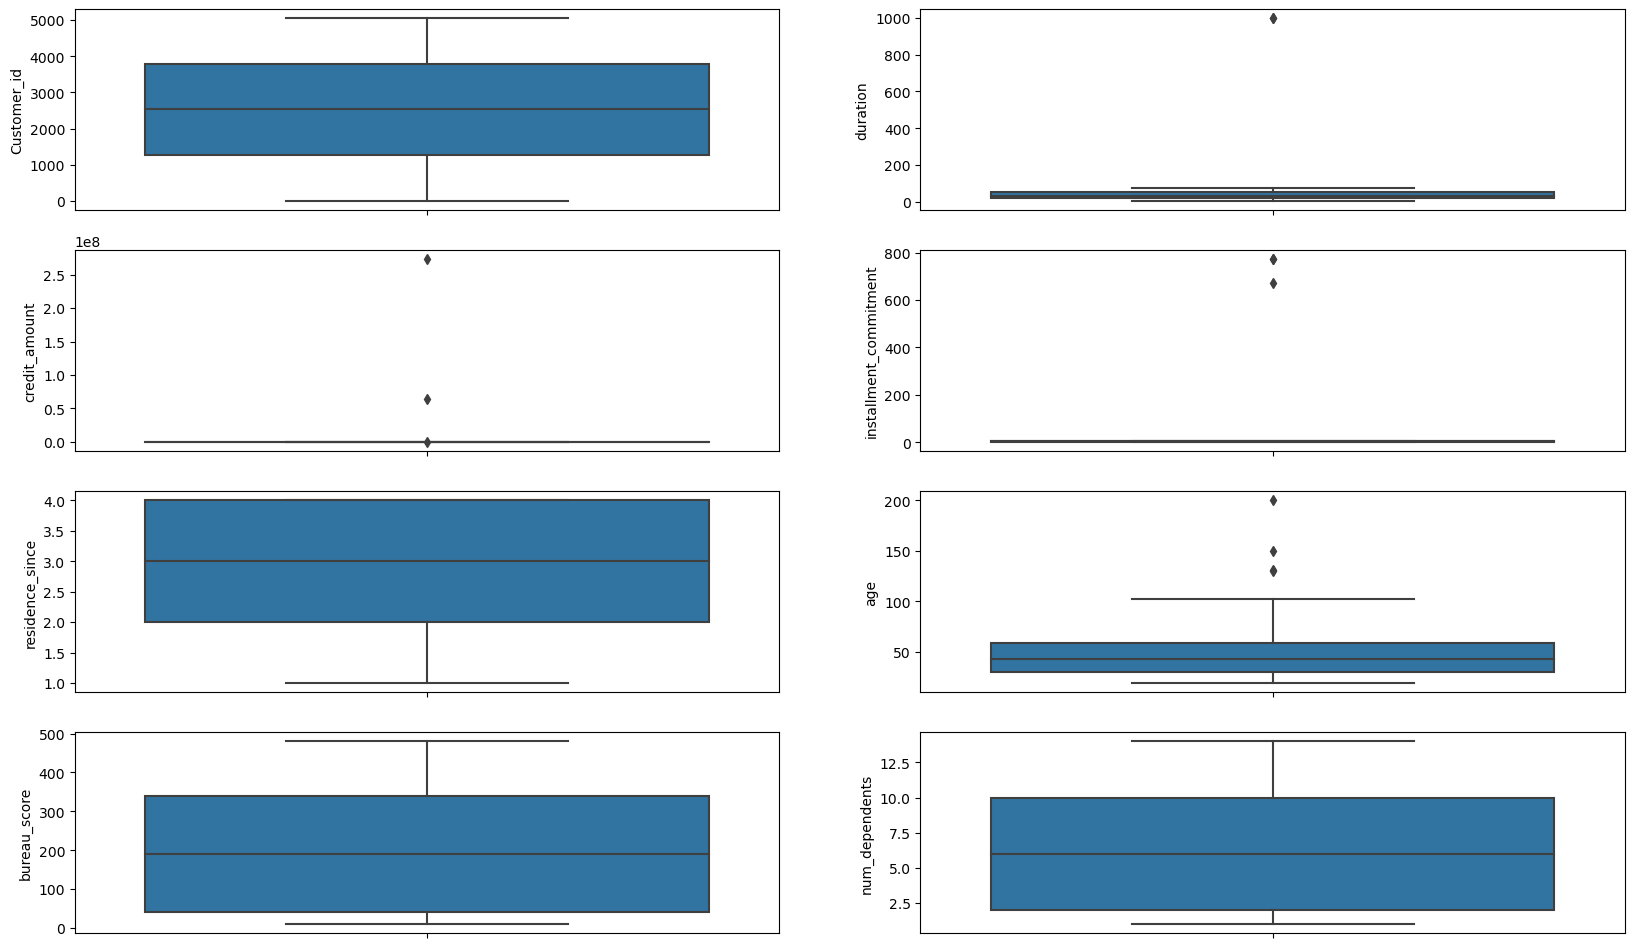

In [22]:
# Boxplot:
# Visualizing the numeric data dispersion
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 12))
index = 0
axs = axs.flatten()
for k,v in df1_num.items():
    sns.boxplot(y=k, data=df1_num, ax=axs[index], orient="h")
    index += 1
    

In [28]:
df3=df1.copy()
df3.duration.describe()

count    5040.000000
mean       35.167460
std        27.613378
min         4.000000
25%        18.000000
50%        33.000000
75%        51.000000
max       999.000000
Name: duration, dtype: float64

In [29]:
# Dealing with the outliers through IQR score method
Q1 = df3['duration'].quantile(0.25)
Q3 = df3['duration'].quantile(0.75)
IQR = Q3 - Q1
df3['duration'] = df3.duration[~((df3.duration < (Q1 - 1.5 * IQR)) |(df3.duration > (Q3 + 1.5 * IQR)))]

In [30]:
df3.duration.describe()

count    5038.000000
mean       34.784835
std        19.844275
min         4.000000
25%        18.000000
50%        33.000000
75%        51.000000
max        72.000000
Name: duration, dtype: float64

In [31]:
df3.describe()

,Customer_id,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
count,5040.000000,5038.000000,5.040000e+03,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,2530.379563,34.784835,7.305361e+04,3.026786,2.550198,44.881548,200.426587,6.244188,2509.171230
std,1455.272627,19.844275,3.946220e+06,18.042448,1.119325,16.717623,155.349144,4.423837,1462.209974
min,1.000000,4.000000,2.500000e+02,1.000000,1.000000,19.000000,10.000000,1.000000,-50.000000
25%,1270.750000,18.000000,9.590000e+02,2.000000,2.000000,30.000000,40.000000,2.000000,1229.750000
50%,2530.500000,33.000000,4.304000e+03,3.000000,3.000000,43.000000,190.000000,6.000000,2536.000000
75%,3790.250000,51.000000,1.087675e+04,4.000000,4.000000,59.000000,340.000000,10.000000,3763.250000
max,5050.000000,72.000000,2.728040e+08,772.000000,4.000000,200.000000,480.000000,14.000000,5000.000000


<Axes: >

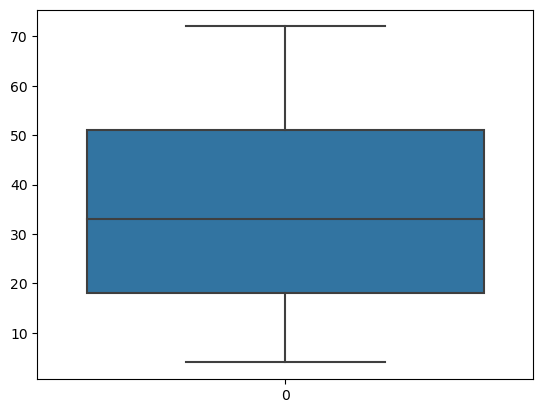

In [32]:
sns.boxplot(df3['duration'])

> now it is very clear that there is no outlier in duration column.

In [33]:
df1_num.columns

Index(['Customer_id', 'duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'bureau_score', 'num_dependents',
       'Spend_debit_card'],
      dtype='object')

<Axes: >

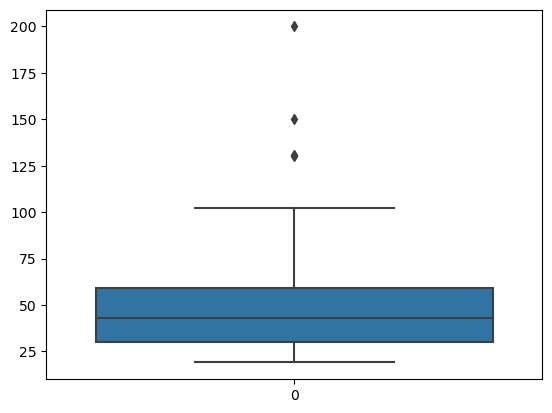

In [34]:
sns.boxplot(df3['age'])

In [35]:
for x in df1_num.columns.values:
    if (x not in ['Customer_id','duration']):
        Q1 = df3[x].quantile(0.25)
        Q3 = df3[x].quantile(0.75)
        IQR = Q3 - Q1
        df3 = df3[~((df3[x] < (Q1 - 1.5 * IQR)) |(df3[x] > (Q3 + 1.5 * IQR)))]
        
    

<Axes: >

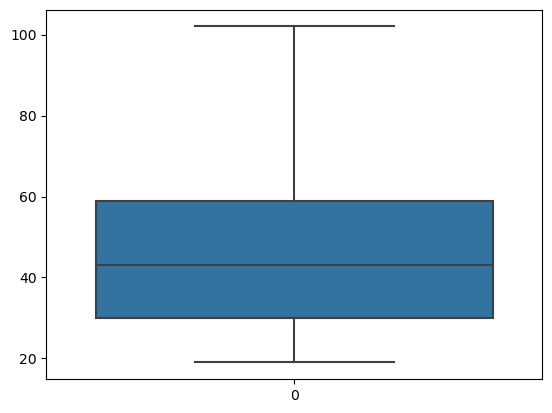

In [36]:
sns.boxplot(df3['age'])

In [37]:
df3.describe()

,Customer_id,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
count,5030.000000,5028.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,2531.145527,34.766905,6263.405169,2.587078,2.549901,44.783499,200.538767,6.243481,2508.929423
std,1452.848383,19.845729,5653.448686,1.138924,1.119343,16.426310,155.373328,4.423388,1461.952621
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,10.000000,1.000000,-50.000000
25%,1274.250000,17.000000,959.250000,2.000000,2.000000,30.000000,40.000000,2.000000,1231.000000
50%,2531.500000,33.000000,4309.000000,3.000000,3.000000,43.000000,190.000000,6.000000,2535.000000
75%,3788.750000,51.000000,10875.750000,4.000000,4.000000,59.000000,340.000000,10.000000,3763.000000
max,5050.000000,72.000000,18424.000000,4.000000,4.000000,102.000000,480.000000,14.000000,5000.000000


In [38]:
df3.isnull().sum()

Customer_id               0
checking_status           0
duration                  2
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

In [39]:
df3.dropna(inplace=True)

In [40]:
df3.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

In [44]:
df3.describe()

,Customer_id,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
count,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000
mean,2532.117940,34.766905,6265.575378,2.586913,2.549722,44.781225,200.521082,6.245169,2509.422832
std,1452.318651,19.845729,5653.520123,1.138946,1.119352,16.426273,155.330993,4.423413,1461.962374
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,10.000000,1.000000,-50.000000
25%,1275.750000,17.000000,959.750000,2.000000,2.000000,30.000000,40.000000,2.000000,1231.000000
50%,2532.500000,33.000000,4311.500000,3.000000,3.000000,43.000000,190.000000,6.000000,2536.000000
75%,3789.250000,51.000000,10876.750000,4.000000,4.000000,59.000000,340.000000,10.000000,3763.250000
max,5050.000000,72.000000,18424.000000,4.000000,4.000000,102.000000,480.000000,14.000000,5000.000000


> totally 37 outlier values removed from the entire dataset. now data is cleaned. 

C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\arsam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


IndexError: index 8 is out of bounds for axis 0 with size 8

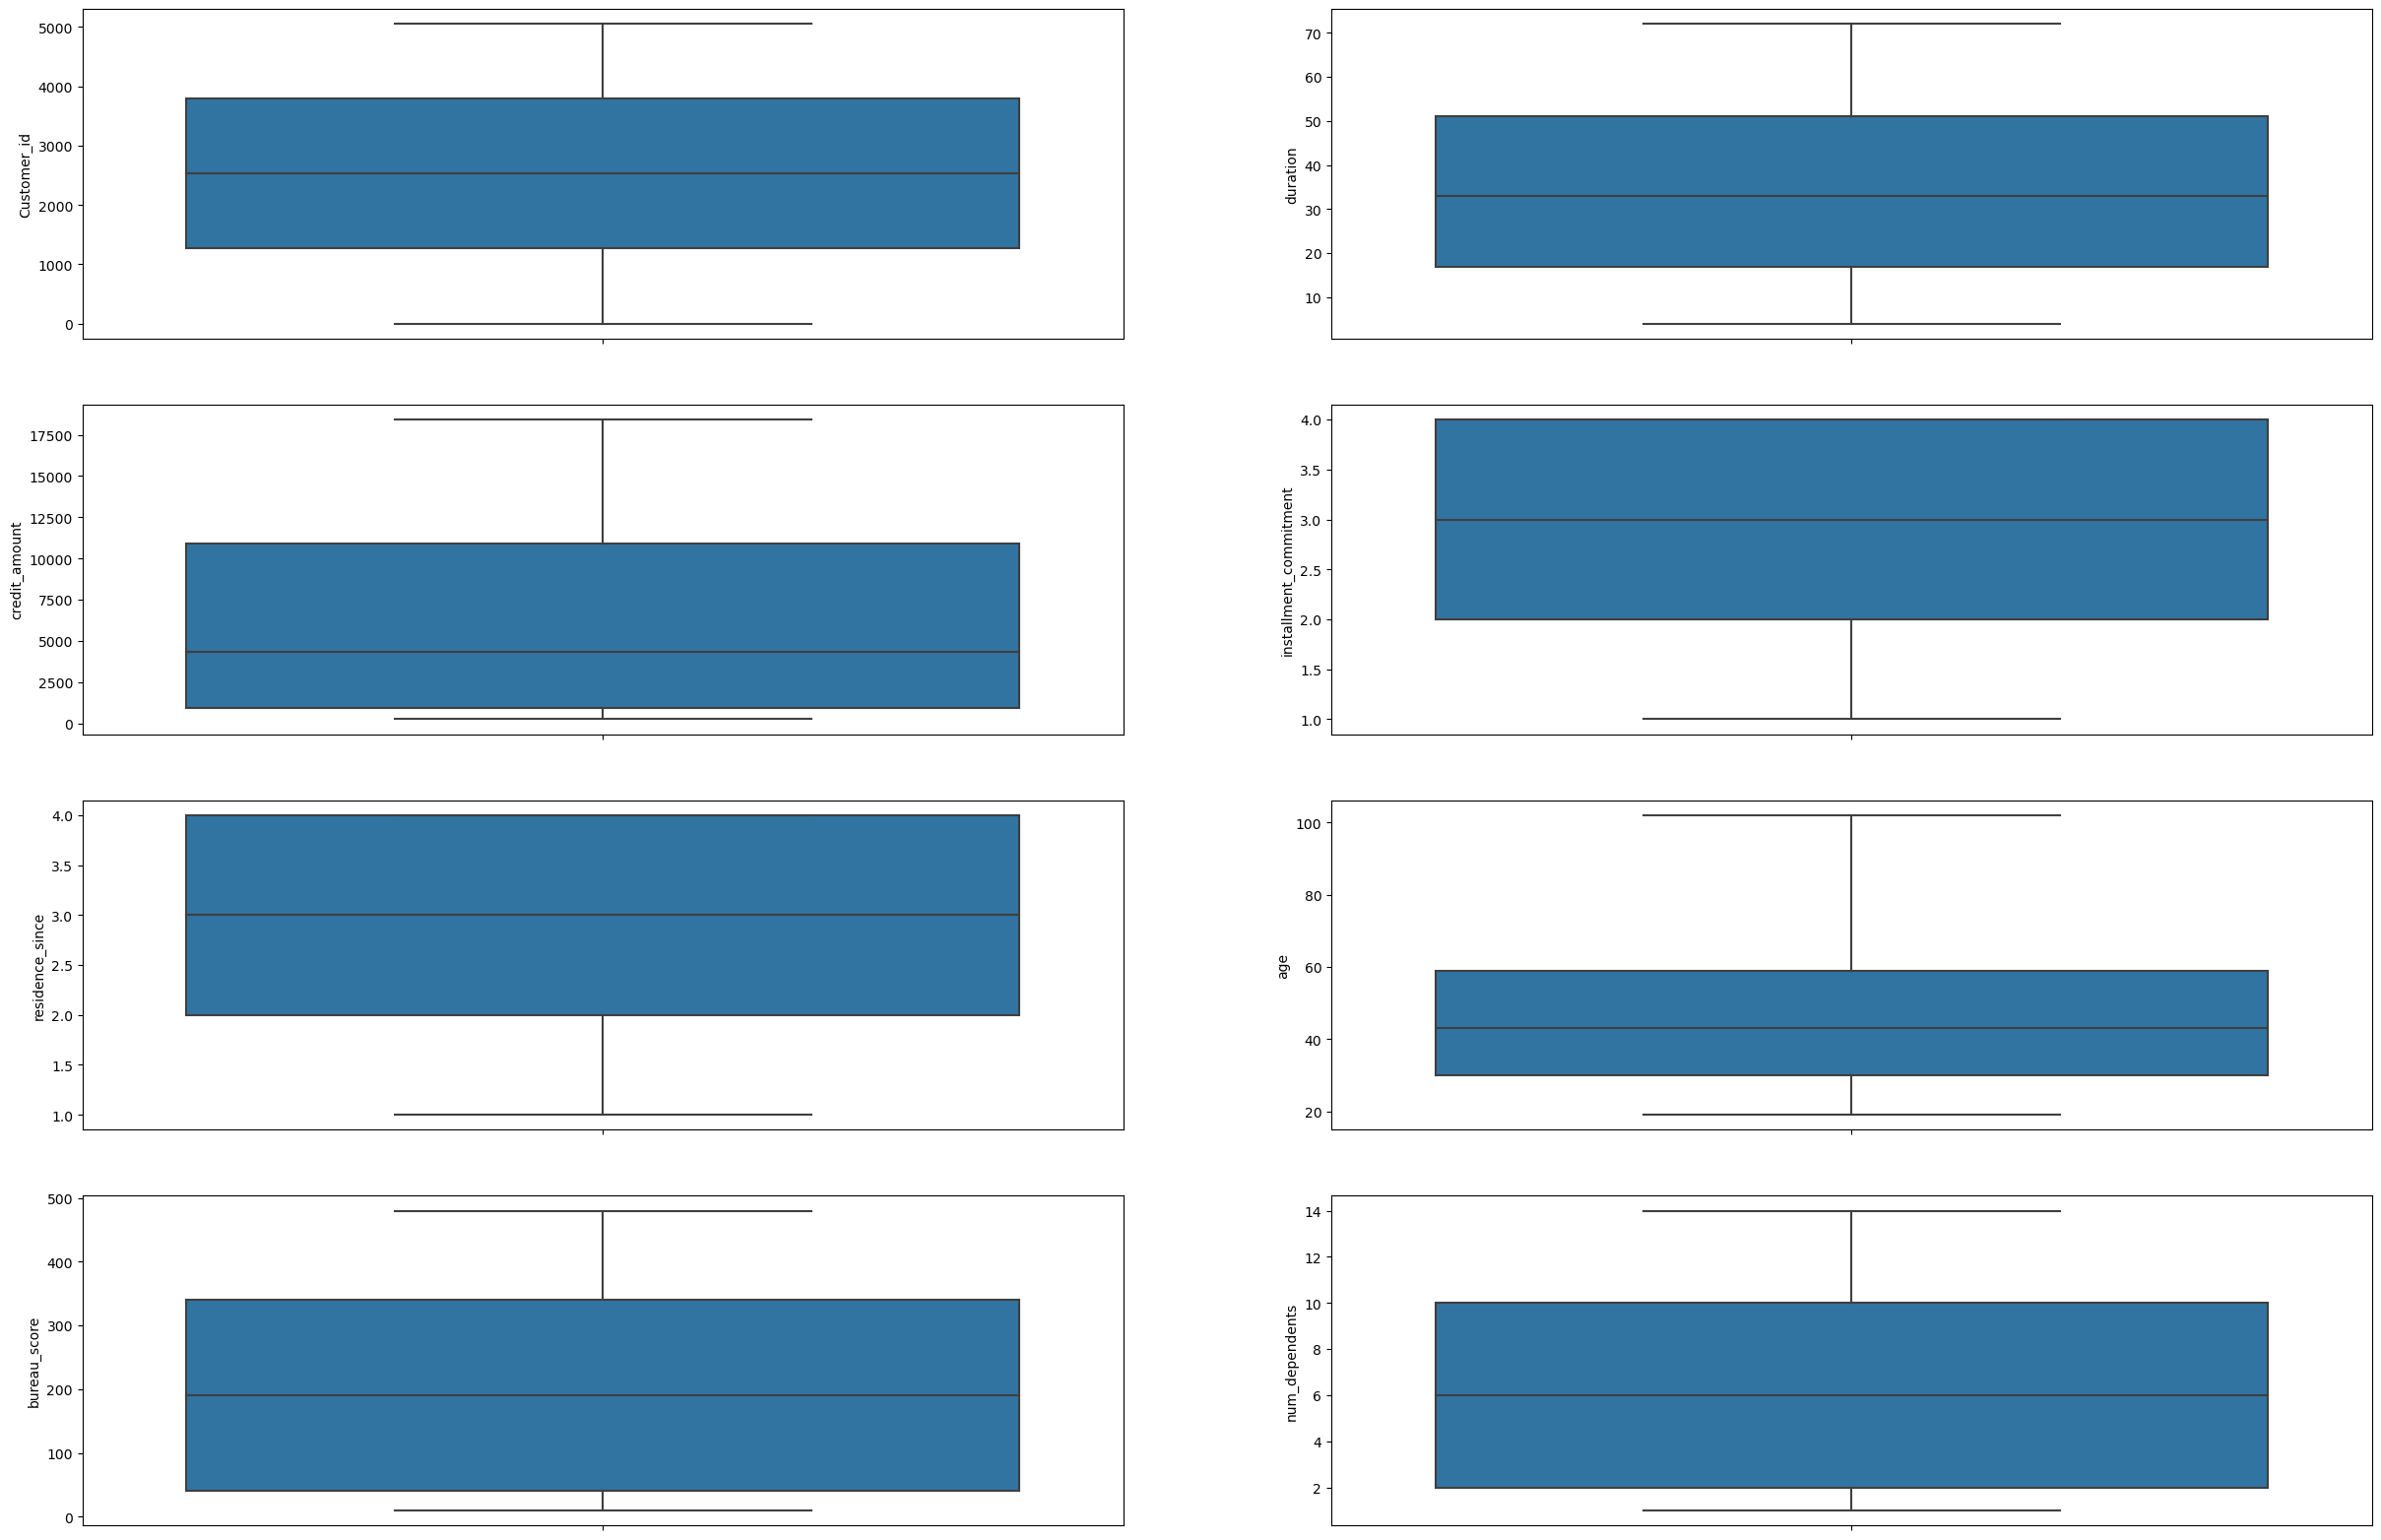

In [42]:
# Boxplot:
# Visualizing the numeric data dispersion
df3_num= df3.select_dtypes(exclude=["object","category"]).copy()
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in df3_num.items():
    sns.boxplot(y=k, data=df3_num, ax=axs[index], orient="h")
    index += 1

> it is very clear from above box plot that major outliers where removed from numerical columns in entire dataset.

In [49]:
#categorical data handling into numerical values
df3['checking_status'] = df3['checking_status'].map({'<0':0, '0<=X<200':1, 'no checking':2, '>=200':3}).astype(int)
df3['credit_history'] = df3['credit_history'].map({'critical/other existing credit':0, 'existing paid':1,
                                                     'delayed previously':2, 'no credits/all paid':3, 'all paid':4}).astype(int)
df3['purpose'] = df3['purpose'].map({'radio/tv':0,'education':1,'furniture/equipment':2,'new car':3,'used car':4,
                                       'business':3, 'domestic appliance':4, 'repairs':5, 'other':6, 'retraining':7}).astype(int)
df3['own_telephone'] = df3['own_telephone'].map({'none': 0, 'yes': 1}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [60]:

df3['foreign_worker'] = df3['foreign_worker'].map({'no': 0, 'yes': 1}).astype(int)
df3['other_payment_plans'] = df3['other_payment_plans'].map({'none':0,'bank':1,'stores':2}).astype(int)
df3['housing'] = df3['housing'].map({'own':1,'for free':0,'rent':2}).astype(int)
df3['job'] = df3['job'].map({'skilled':1,'unskilled resident':0,'high qualif/self emp/mgmt':2,'unemp/unskilled non res':3}).astype(int)
df3['property_magnitude'] = df3['property_magnitude'].map({'real estate':1,'no known property':0,'life insurance':2,'car':3}).astype(int)
df3['other_parties'] = df3['other_parties'].map({'guarantor':1,'none':0,'co applicant':2}).astype(int)
df3['personal_status'] = df3['personal_status'].map({'male single':0, 'female div/dep/mar':1, 'male div/sep':2, 'male mar/wid':3}).astype(int)


In [55]:
df3['savings_status'] = df3['savings_status'].map({'no known savings':0, '<100':1, '500<=X<1000':2, '>=1000':3,'100<=X<500':4}).astype(int)
df3['employment'] = df3['employment'].map({'>=7':1, '1<=X<4':2, '4<=X<7':3,'unemployed':0, '<1':4}).astype(int)
df3['class'] = df3['class'].map({'good':1, 'bad':0}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [47]:
df3.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5028 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_id             5028 non-null   int64  
 1   checking_status         5028 non-null   int32  
 2   duration                5028 non-null   float64
 3   credit_history          5028 non-null   int32  
 4   purpose                 5028 non-null   int32  
 5   credit_amount           5028 non-null   float64
 6   savings_status          5028 non-null   int32  
 7   employment              5028 non-null   int32  
 8   installment_commitment  5028 non-null   int64  
 9   personal_status         5028 non-null   int32  
 10  other_parties           5028 non-null   int32  
 11  residence_since         5028 non-null   int64  
 12  property_magnitude      5028 non-null   int32  
 13  age                     5028 non-null   int64  
 14  other_payment_plans     5028 non-null   

> now all categorical columns converted into numerical columns

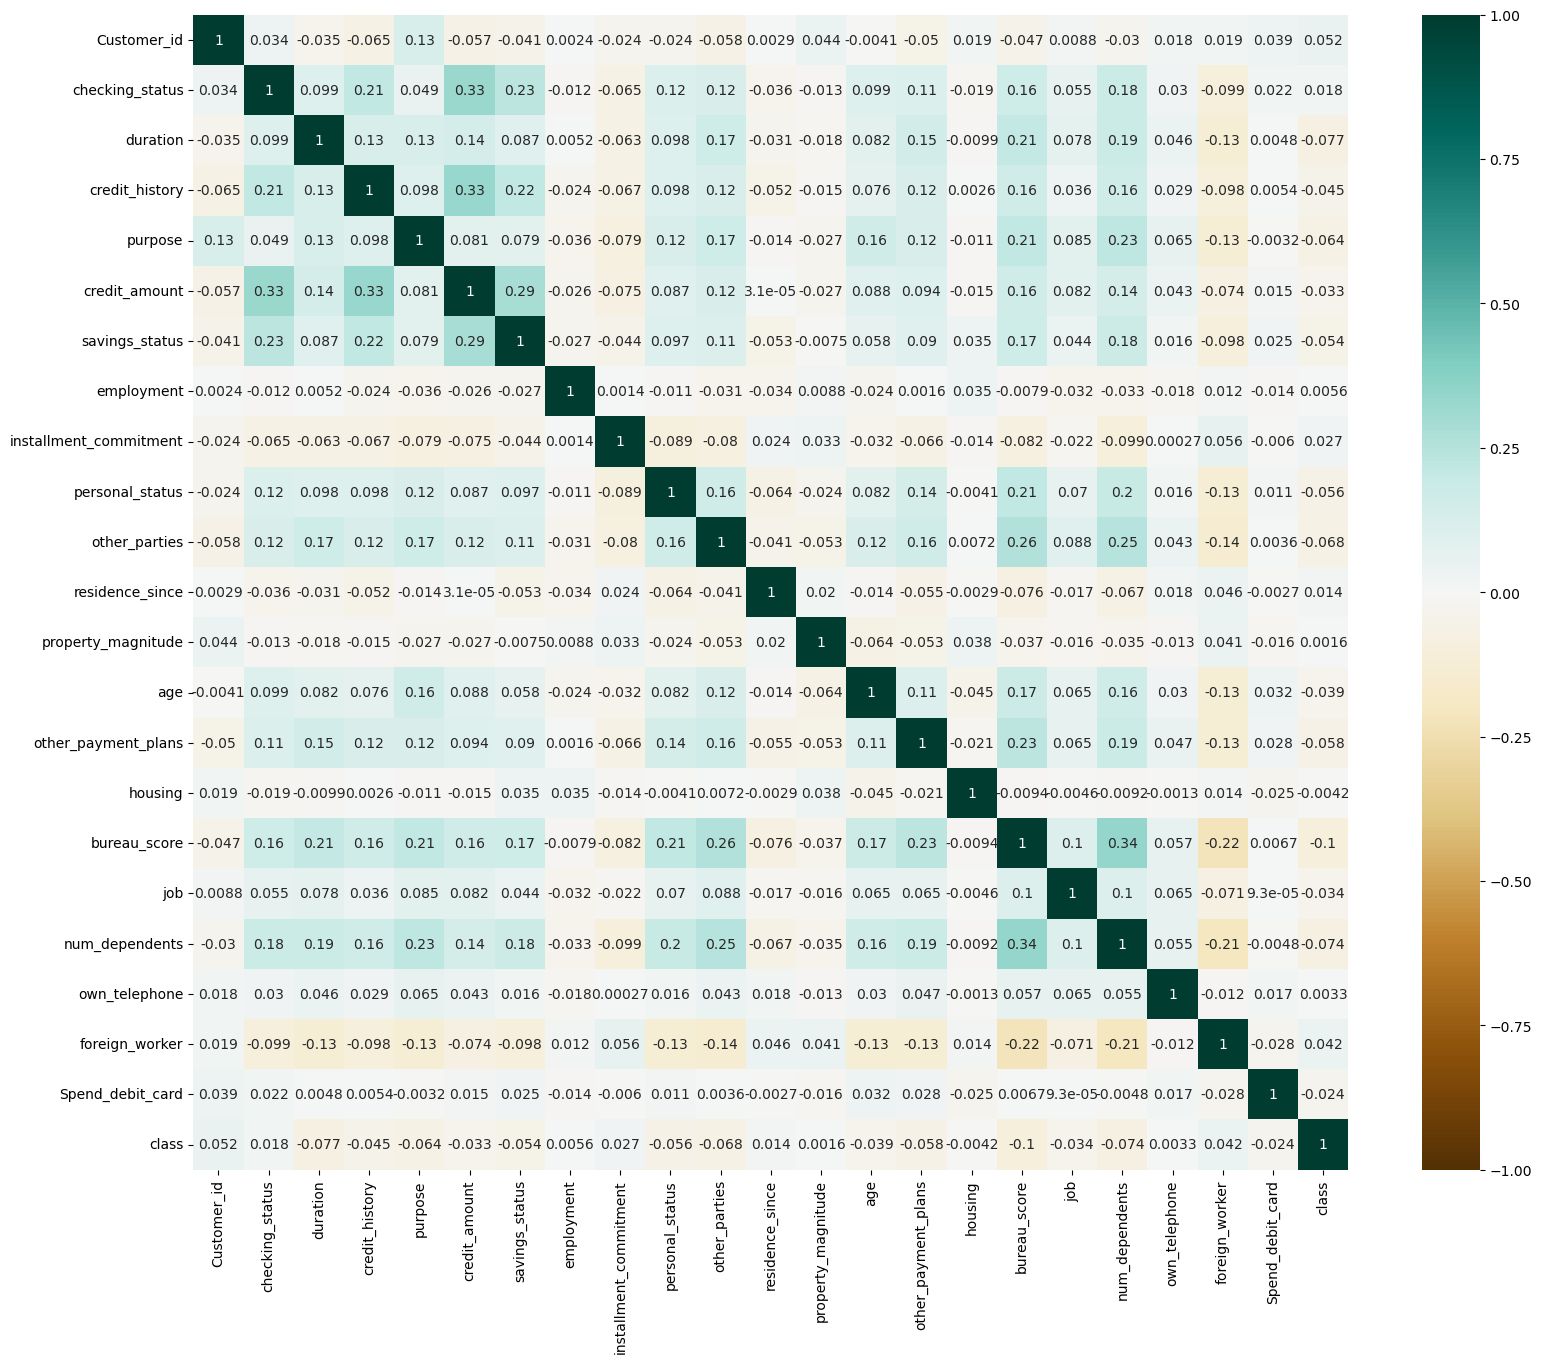

In [63]:
plt.figure(figsize=(19, 15))
sns.heatmap(df3.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG');

> from the correlation heatmap, It is clear that employment,instalment_commitment,residence_since,housing,foreighn_worker are very corelated to the target class.

In [64]:
# customer_id is not necessory for feature selection.
df4 = df3.drop(['Customer_id'],axis = 1)

In [76]:
df4 =df4[~df4['Spend_debit_card']<0]
df4.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'bureau_score', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'Spend_debit_card', 'class'],
      dtype='object')

In [78]:
X = df4.drop(['class'],axis =1)
y = df4["class"]

In [79]:
X.columns.values

array(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age',
       'other_payment_plans', 'housing', 'bureau_score', 'job',
       'num_dependents', 'own_telephone', 'foreign_worker',
       'Spend_debit_card'], dtype=object)

# feature selection using chi-sqr

In [80]:
from sklearn.feature_selection import chi2,f_regression
scores,cpvalues = chi2(X,y)
df5 = pd.DataFrame()
df5["features"] = X.columns.values
df5["p_val"] = cpvalues.round(3)
df5

,features,p_val
0,checking_status,0.399
1,duration,0.000
2,credit_history,0.001
3,purpose,0.000
4,credit_amount,0.000
5,savings_status,0.001
6,employment,0.749
7,installment_commitment,0.162
8,personal_status,0.000
9,other_parties,0.000


In [82]:
# we can remove features which are not very important (if p_value >0.05 then it is not important).
df5[df5['p_val']<0.05]

,features,p_val
1,duration,0.000
2,credit_history,0.001
3,purpose,0.000
4,credit_amount,0.000
5,savings_status,0.001
8,personal_status,0.000
9,other_parties,0.000
12,age,0.000
13,other_payment_plans,0.000
15,bureau_score,0.000


In [85]:
df6 = df5[df5['p_val']<0.05]

In [91]:
impcol = list(df6['features'].values)
impcol

['duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'personal_status',
 'other_parties',
 'age',
 'other_payment_plans',
 'bureau_score',
 'job',
 'num_dependents',
 'Spend_debit_card']

In [92]:
X = X[impcol]

In [101]:
X.head(20)
X.shape


(4980, 13)

# splitting data

In [95]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Applying ML Classification Algorithms

In [98]:
# LOGISTIC REGRESSION:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
train_pred= model.predict(X_train)
ypred = model.predict(X_test)
# evaluate predictions
accuracy_train = accuracy_score(y_train,train_pred)
accuracy = accuracy_score(y_test, ypred)
print('train_Accuracy_score: %.2f' % (accuracy_train*100))
print('Test_Accuracy_score: %.2f' % (accuracy*100))

train_Accuracy_score: 63.33
Test_Accuracy_score: 63.15


In [99]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
# predict on test set
train_pred= model.predict(X_train)
ypred = clf.predict(X_test)
# evaluate predictions
accuracy_train = accuracy_score(y_train,train_pred)
accuracy = accuracy_score(y_test, ypred)
print('train_Accuracy_score: %.2f' % (accuracy_train*100))
print('Test_Accuracy_score: %.2f' % (accuracy*100))

train_Accuracy_score: 63.33
Test_Accuracy_score: 63.45
